### 데이터 준비

In [ ]:
import numpy as np
import pandas as pd

- 데이터
    - https://kr.investing.com/crypto/bitcoin/historical-data

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/데이터분석스쿨2기/share/12.데이터활용및과학방법론-12/Bitcoin.csv',
            index_col=0 )
# 단위, 달러 단위
df

,종가,오픈,고가,저가,거래량,변동 %
날짜,,,,,,
2017년 12월 11일,"16,732.5","15,060.5","17,399.2","15,024.6",159.73K,11.11%
2017년 12월 10일,"15,059.6","14,840.0","15,783.2","13,031.0",201.62K,1.46%
2017년 12월 09일,"14,843.4","16,048.2","16,313.2","13,151.5",181.98K,-7.50%
2017년 12월 08일,"16,047.6","16,868.0","17,294.8","13,906.1",286.76K,-4.76%
2017년 12월 07일,"16,850.3","13,750.1","16,879.3","13,401.6",297.11K,22.55%
...,...,...,...,...,...,...
2017년 10월 16일,"5,759.3","5,677.4","5,795.3","5,576.1",61.36K,1.25%
2017년 10월 15일,"5,688.1","5,824.7","5,862.7","5,448.2",101.64K,-2.34%
2017년 10월 14일,"5,824.7","5,637.3","5,839.6","5,568.9",76.22K,3.33%


In [ ]:
df.sort_index(inplace=True)

In [ ]:
tmp = df.reset_index()
tmp.head(2)

,날짜,종가,오픈,고가,저가,거래량,변동 %
0,2017년 10월 12일,"5,432.6","4,824.2","5,432.6","4,815.0",163.92K,12.61%
1,2017년 10월 13일,"5,637.3","5,432.6","5,852.8","5,392.0",215.02K,3.77%


In [ ]:
tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   날짜      61 non-null     object
 1   종가      61 non-null     object
 2   오픈      61 non-null     object
 3   고가      61 non-null     object
 4   저가      61 non-null     object
 5   거래량     61 non-null     object
 6   변동 %    61 non-null     object
dtypes: object(7)
memory usage: 3.5+ KB


In [ ]:
# 날짜 양식 조정
tmp['날짜'] = tmp['날짜'].apply( lambda x:x.replace('년 ','-').replace('월 ','-').replace('일',''))

In [ ]:
tmp.head(1)

,날짜,종가,오픈,고가,저가,거래량,변동 %
0,2017-10-12,"5,432.6","4,824.2","5,432.6","4,815.0",163.92K,12.61%


In [ ]:
# 인덱스 다시 시간으로 위치
df = tmp.set_index( keys=['날짜'])
df.head(1)

,종가,오픈,고가,저가,거래량,변동 %
날짜,,,,,,
2017-10-12,"5,432.6","4,824.2","5,432.6","4,815.0",163.92K,12.61%


In [ ]:
close_price = df['종가']
close_price

날짜
2017-10-12     5,432.6
2017-10-13     5,637.3
2017-10-14     5,824.7
2017-10-15     5,688.1
2017-10-16     5,759.3
                ...   
2017-12-07    16,850.3
2017-12-08    16,047.6
2017-12-09    14,843.4
2017-12-10    15,059.6
2017-12-11    16,732.5
Name: 종가, Length: 61, dtype: object

In [ ]:
close_price = close_price.apply(lambda x:x.replace(',',''))
close_price

날짜
2017-10-12     5432.6
2017-10-13     5637.3
2017-10-14     5824.7
2017-10-15     5688.1
2017-10-16     5759.3
               ...   
2017-12-07    16850.3
2017-12-08    16047.6
2017-12-09    14843.4
2017-12-10    15059.6
2017-12-11    16732.5
Name: 종가, Length: 61, dtype: object

In [ ]:
close_price = close_price.astype( np.float64 )

In [ ]:
close_price.dtype

dtype('float64')

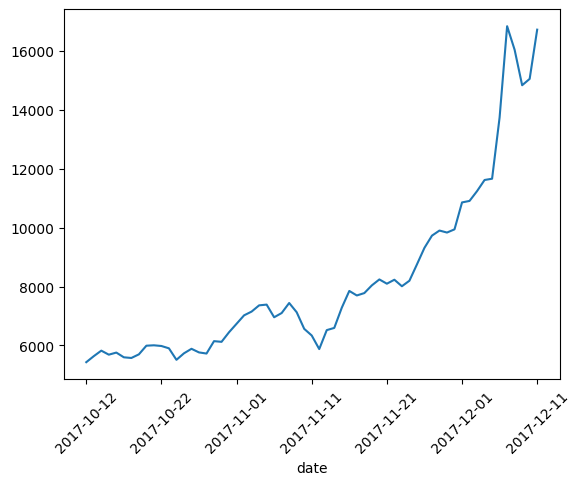

In [ ]:
# 종가 데이터를 이용한 차트 확인
close_price.index.name = 'date'
close_price.plot(rot=45);

### ARIMA 모형의 모수

- ARIMA 모형을 따르는 (아리마) 분포를 특징을 규정하는 척도
    - p
        - AR 모형의 차수(시간 지연 수)
        - 차수(lag)
    - d
        - 차분(Difference) 횟수
        - 데이터를 과거값에 빼는 행위를 한 횟수
    - q
        - MA 모형의 이동 평균 모델의 순서

- p,d,q 의 계산적 특징
    - p*q = 0
        - 둘중 하나는 반드시 0이다
            - 둘중 하나는 반드시 0< ~ < 2 사이 값
                - 만약 정수라면 1로 가정
        - 특정 데이터는 아리마모형으로 분석한 결과 한쪽의 경향을 강하게 띤다
    - p+q < 2
    - p, d, q는 일반적으로 음이 아닌 정수

- 모수 추정
    - **p**, d, **q**를 정하는 방법
    - ACF plot
        - Autocorrelation function
        - 자기 상관 함수
            - 관측치들 사이의 관련성 추정
    - PACF plot
        - Partial Autocorrelation function
        - 편 자기 상관 함수
            - 모든 관측치 X, 두 관측치의 관련성 추정
    - 해석
        - 시계열 데이터가 AR 특성을 가짐
            - ACF 천천히 감소
            - PACF 최초 시차를 제외, 급격하게 감소
        - 시계열 데이터가 MA 특성을 가짐
            - ACF 급격히 감소
            - PACF 천천히 감소


TypeError: plot_pacf() missing 1 required positional argument: 'x'

<Figure size 2000x500 with 0 Axes>

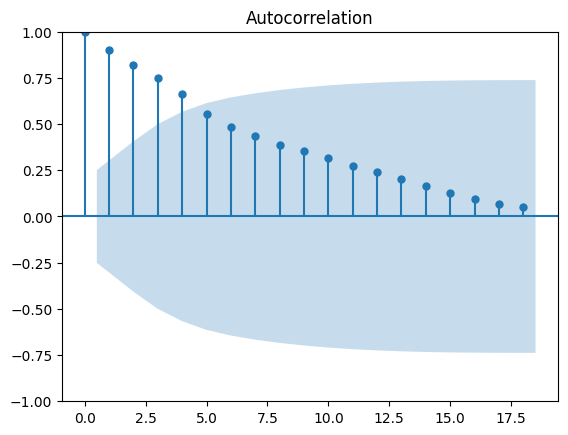

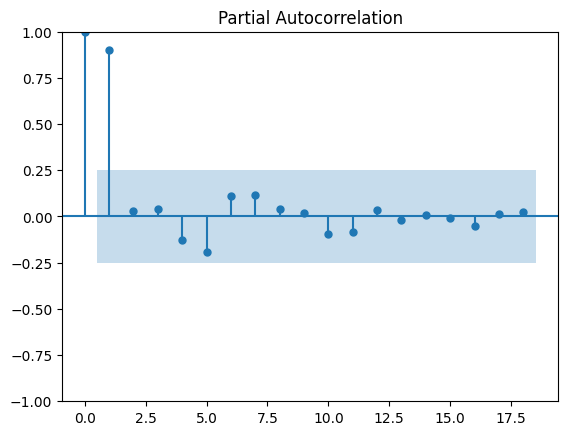

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.figure(figsize=(20, 5))
plot_acf( close_price)
plot_pacf( close_price)
plt.show()

# acf는 천천히 감소
# pacf는 급격히 감소
# 위의 특성상 비트코인 종가 데이터는 AR 특성을 띤다
# p*q = 0, p + q < 2 => p값은 1(정수기준), q=0 추정

In [ ]:
# 차분 계산
# 1일단위 차분
close_price.diff(periods=1)

date
2017-10-12       NaN
2017-10-13     204.7
2017-10-14     187.4
2017-10-15    -136.6
2017-10-16      71.2
               ...  
2017-12-07    3100.7
2017-12-08    -802.7
2017-12-09   -1204.2
2017-12-10     216.2
2017-12-11    1672.9
Name: 종가, Length: 61, dtype: float64

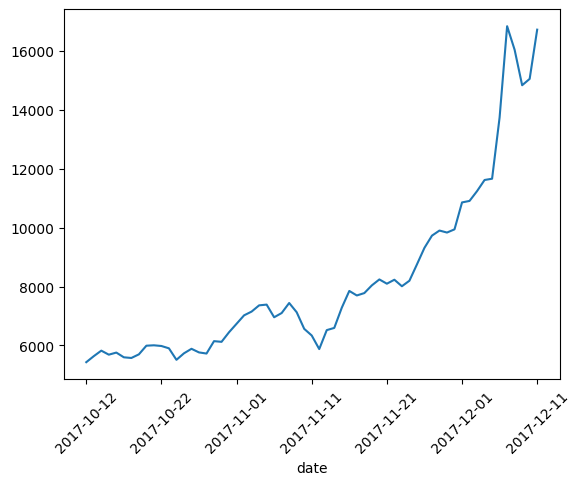

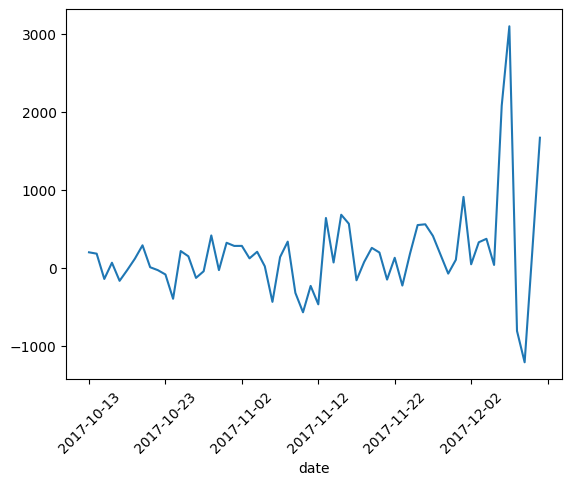

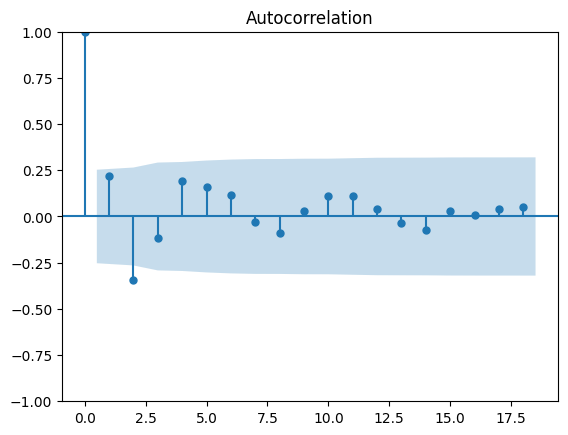

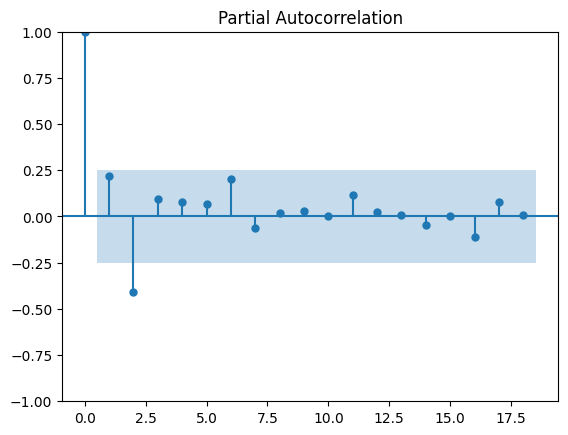

In [ ]:
# 차분 시각화

# 차분 데이터 -> 결측 제거하여 사용
diff_data = close_price.diff(periods=1).iloc[1:]

# 종가
close_price.plot(rot=45)
plt.show()

# 차분
diff_data.plot(rot=45)
plt.show()

# 차분의 ACF, PACF
plot_acf(  diff_data)
plt.show()

plot_pacf( diff_data)
plt.show()

# 2017년 12월 초 -> 상당향의 급등락이 보임
# 차분값은 초반이후 ACF, PACF 상태가 안정화됨 -> 시계열 분석은 정상상태로 판단

### ARIMA 모형 분석

In [ ]:
# ARIMA 모형 사용
from statsmodels.tsa.arima.model import ARIMA

# order 모수입력 => [p,d,q] : AR 특성, 차분적용(안정화되어 있음), MA 특성은 약함
model = ARIMA(close_price, order=[1, 1, 0])
model_fit = model.fit()

'''
    - P>|z| 값은 학습의 적정성을 확이하는 t-test 요소
    - P>|z|=0.000 < 0.05 보다 작으므로 ARIMA 모형은 적합함
'''

# 요약
print( model_fit.summary() )

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                     종가   No. Observations:                   61
Model:                 ARIMA(1, 1, 0)   Log Likelihood                -469.882
Date:                Mon, 27 May 2024   AIC                            943.763
Time:                        01:21:32   BIC                            947.952
Sample:                    10-12-2017   HQIC                           945.402
                         - 12-11-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2882      0.052      5.592      0.000       0.187       0.389
sigma2      3.685e+05    3.5e+04     10.541      0.000       3e+05    4.37e+05
Ljung-Box (L1) (Q):                   0.40   Jarque-

In [ ]:
close_price

date
2017-10-12     5432.6
2017-10-13     5637.3
2017-10-14     5824.7
2017-10-15     5688.1
2017-10-16     5759.3
               ...   
2017-12-07    16850.3
2017-12-08    16047.6
2017-12-09    14843.4
2017-12-10    15059.6
2017-12-11    16732.5
Name: 종가, Length: 61, dtype: float64

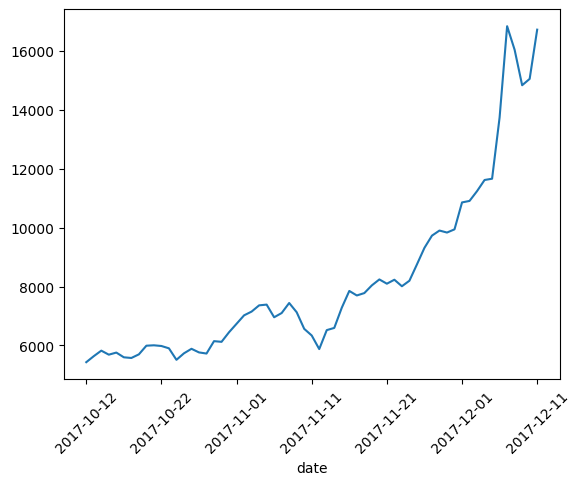

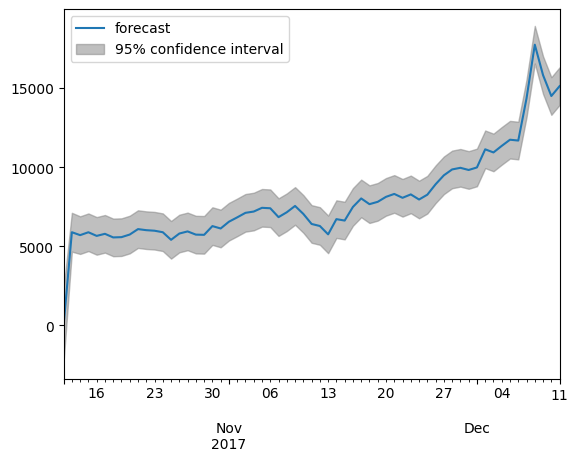

In [ ]:
# 모델을 통해서 주가를 예측 수행
from statsmodels.graphics.tsaplots import plot_predict

close_price.plot( rot=45 )
# 예측 모델로 가격을 시각화
plot_predict(model_fit, '2017-10-12', '2017-12-11')
plt.show()

# 실제 주가의 추세를 잘 따라가고 있다

In [ ]:
# 실제 가격 예측
# 10일치 예측
model_fit.forecast( steps=10 )

# QnA때 확인

2017-12-12    17214.587423
2017-12-13    17353.512812
2017-12-14    17393.547591
2017-12-15    17405.084601
2017-12-16    17408.409275
2017-12-17    17409.367362
2017-12-18    17409.643458
2017-12-19    17409.723022
2017-12-20    17409.745951
2017-12-21    17409.752558
Freq: D, Name: predicted_mean, dtype: float64

- 시계열 분석에 적용되는 데이터
    - 단수 종가가 아닌
    - 자체 알고리즘(정량적, 정성적인요소, 수식등등 )에 의한 데이터로 진행
    - 단, IOT, 스마트팩토리 -> 정량적분석 가능

# 혼합형 시계열 분석

## fbprophet

- 종류
    - 모형/방법
        - AR
        - **Prophet** : Meta 의 제품
            - https://facebook.github.io/prophet/docs/quick_start.html
            - fb-Prophet

In [ ]:
!pip install fbprophet -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.0/64.0 kB 685.5 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.9/47.9 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 20.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 70.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 kB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.3/45.3 MB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 73.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.3/49.3 kB 4.7 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for fbprophe

In [ ]:
# 웹클릭 데이터를 이용한 시계열 분석 -> 웹로그
web_traffic = pd.read_csv('/content/drive/MyDrive/데이터분석스쿨2기/share/12.데이터활용및과학방법론-12/webTraffic.csv')
# 1년치 데이터로 예상
web_traffic.shape

(365, 2)

In [ ]:
df = web_traffic.copy(True)
df.shape

(365, 2)

In [ ]:
df.head(2)

,16. 7. 1.,766
0,16. 7. 2.,377
1,16. 7. 3.,427


In [ ]:
df.tail(2)

,16. 7. 1.,766
363,17. 6. 30.,"1,193"
364,NaN,NaN


In [ ]:
# 결측 제거
df.dropna(inplace=True)

In [ ]:
# 컬럼명 조정 => DS	Y(대소문자 관계 없이 고정)
df.columns = ['ds','y']
df.head(1)

,ds,y
0,16. 7. 2.,377


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 364 entries, 0 to 363
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ds      364 non-null    object
 1   y       364 non-null    object
dtypes: object(2)
memory usage: 16.6+ KB


In [ ]:
# ds 형식 변경 yyyy-MM-dd
df['ds'] = pd.to_datetime( df['ds'], format='%y. %m. %d.')
df.head(1)

,ds,y
0,2016-07-02,377


In [ ]:
df['y'] = df.y.apply( lambda x:x.replace(',',''))
df['y']

0       377
1       427
2       902
3       850
4       876
       ... 
359    1309
360    1436
361    1387
362    1328
363    1193
Name: y, Length: 364, dtype: object

In [ ]:
# 최종데이터 - 데이터 클리닝 작업, fbprophet 형태에 맞게 가공함
# 통계 모델, 혼합형 모델(서드 파트 제품) => 1개 피처만 사용 => 피처에 여러
# 요소를 가미하지 않으면 1개 피처만으로 예측 문제가 발생 => 성능 저하
from prophet import Prophet

# 주기성 설정및 다양한 요소 적용 가능함
# 년간, 일간 주기성 분석
model = Prophet( yearly_seasonality=True, daily_seasonality=True)

In [ ]:
# 훈련
model.fit( df )

DEBUG:cmdstanpy:input tempfile: /tmp/tmpigeuavg7/ssilssv5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpigeuavg7/xlp80yn8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=82164', 'data', 'file=/tmp/tmpigeuavg7/ssilssv5.json', 'init=/tmp/tmpigeuavg7/xlp80yn8.json', 'output', 'file=/tmp/tmpigeuavg7/prophet_modeliyt1gnm_/prophet_model-20240527014608.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
01:46:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
01:46:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
# 예측 : periods를 지정 => 해당 기간만큼 예측
future = model.make_future_dataframe( periods=60 )
# 훈련 데이터양 + 이후 60일 데이터가 생성
# 424 = 364 + 60
future.shape

(424, 1)

In [ ]:
df.tail(2)

,ds,y
362,2017-06-29,1328
363,2017-06-30,1193


In [ ]:
# 7월 ~8월까지 예측 날짜
future.tail(2)

,ds
422,2017-08-28
423,2017-08-29


In [ ]:
# ds값이 포한된 데이터를 이용 => 예측
forecast = model.predict( future )

# 최종 결과 + 각종 지표들 출력(이 지표을 이용하면 인사이트 도출이 편함)
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
419,2017-08-25,951.783318,766.831662,1202.135978,951.783301,951.783335,39.231553,39.231553,39.231553,516.2068,...,-52.673775,-52.673775,-52.673775,-424.301472,-424.301472,-424.301472,0.0,0.0,0.0,991.014872
420,2017-08-26,952.847881,345.675850,775.956037,952.847863,952.847898,-375.203641,-375.203641,-375.203641,516.2068,...,-466.745048,-466.745048,-466.745048,-424.665392,-424.665392,-424.665392,0.0,0.0,0.0,577.644240
421,2017-08-27,953.912443,507.578825,911.724576,953.912425,953.912461,-244.173978,-244.173978,-244.173978,516.2068,...,-334.812292,-334.812292,-334.812292,-425.568486,-425.568486,-425.568486,0.0,0.0,0.0,709.738465
422,2017-08-28,954.977006,1063.693442,1462.518750,954.976987,954.977024,306.900694,306.900694,306.900694,516.2068,...,217.606270,217.606270,217.606270,-426.912376,-426.912376,-426.912376,0.0,0.0,0.0,1261.877700
423,2017-08-29,956.041568,1082.470341,1503.176637,956.041549,956.041587,341.181365,341.181365,341.181365,516.2068,...,253.546224,253.546224,253.546224,-428.571659,-428.571659,-428.571659,0.0,0.0,0.0,1297.222933


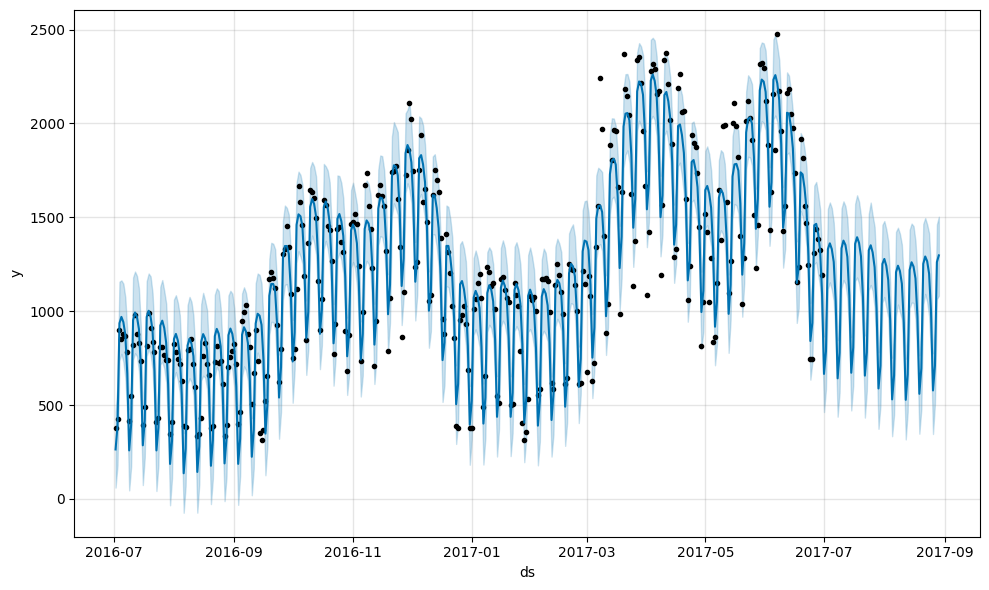

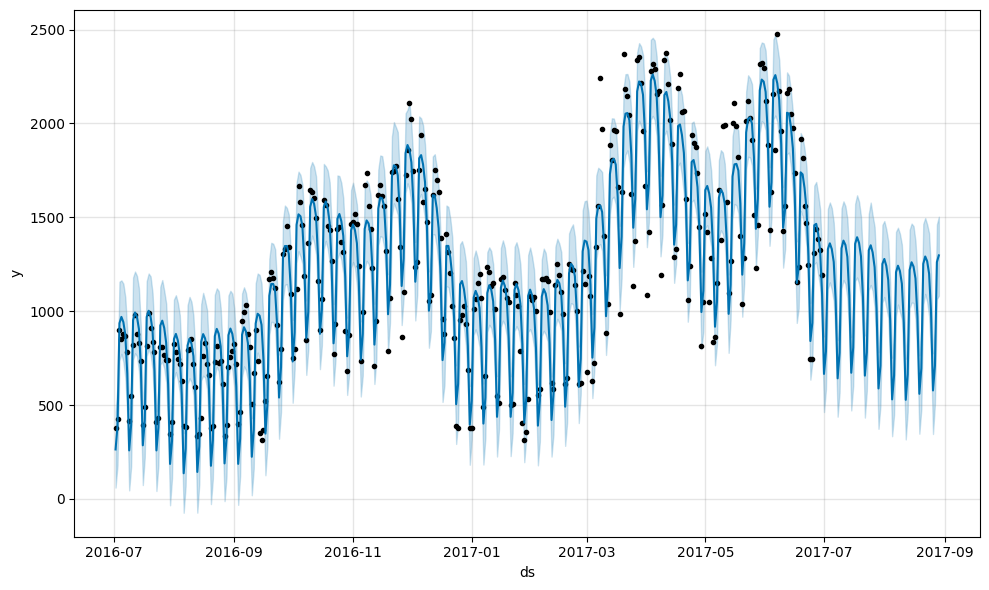

In [ ]:
# 예측결과 시각화
model.plot( forecast )

# 점이 찍힌곳 => 기존 데이터(원본)
# 점이 없는곳 => 예측해서 그린 구간
# 예측 결과에 의하면 클릭수가 줄어들고 있다 -> 사이트에 대한 관심도가 적어지고 있다...

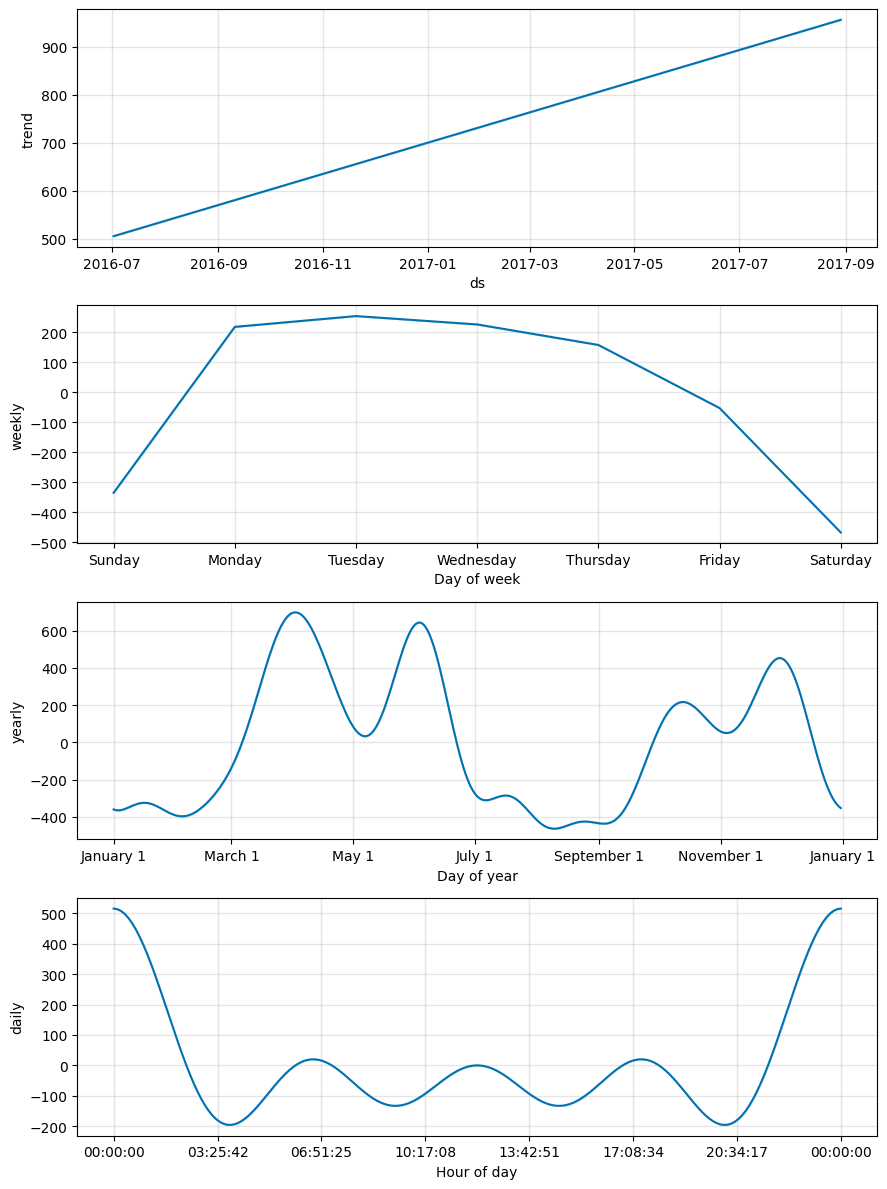

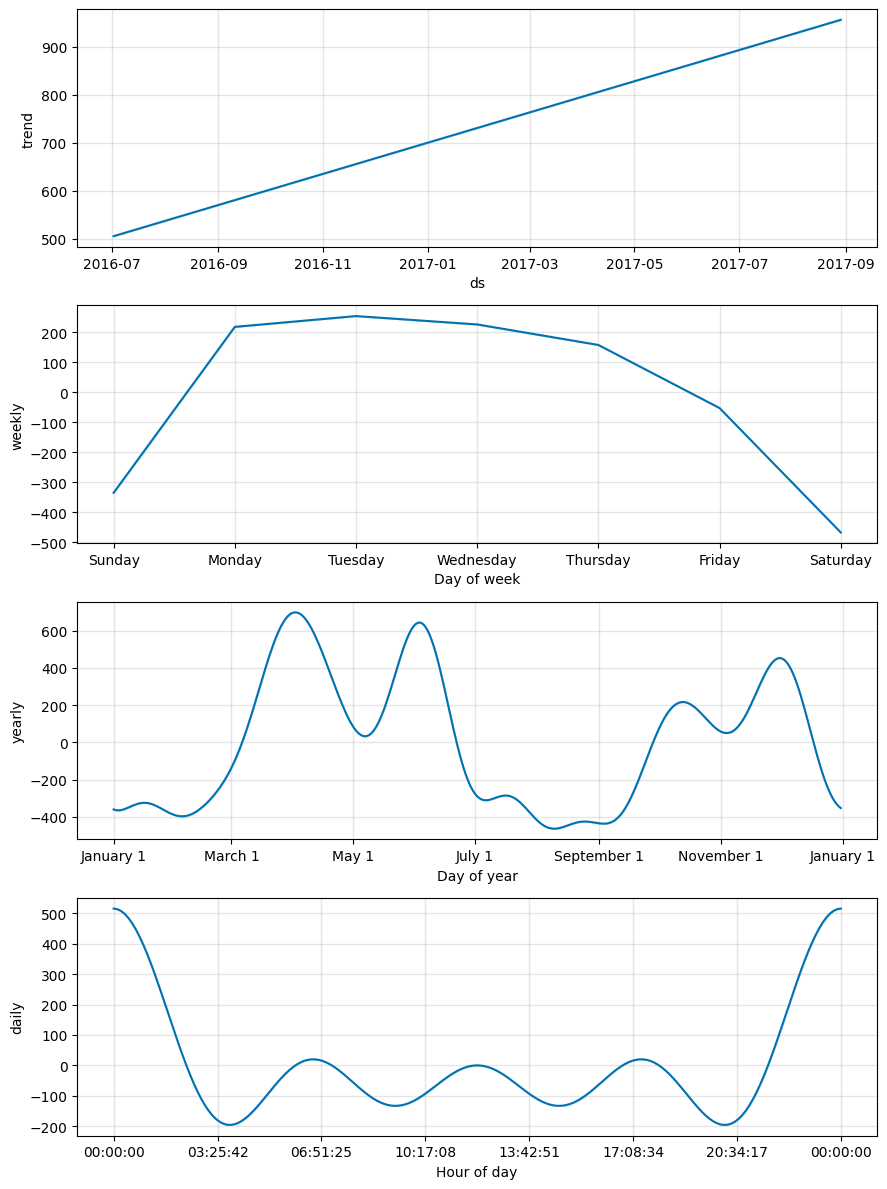

In [ ]:
# 주기성등 기타 분석
model.plot_components( forecast )

# 트랜드 : 클릭수는 향상되고 있음
# 주간 기준 트랜드 : 월, 화요일 피크, 주말로 갈수록 하락세 (사용자는 월화에 많이 몰림)
# 여름, 겨울에 클릭수가 바닥을 찍는다? => 봄/가을에 클릭수가 높음
# 20시 30분 기점부터 12시까지 큰 증가세를 보임, 03시 까지 다시 하락

# 머신러닝/딥러닝 시계열 분석

- 종류
    - 모델/모형
        - 순환신경망
            - RNN/**LSTM**/GRU
                - 데이터를 조정
                    - 주식
                    - 7일 기준 학습 -> 8일차 예측
                        - 매일 하루씩 쉬프트 하여 데이터 구축
                - 모델 + 학습 + 예측 + 시각화
        - transformers
        - 앙상블기법
        - ...

## LSTM기반 시계열데이터(금융분야-주가) 예측모델 구축

### 데이터 획득

- NVDA 주가 데이터
    - 인공지능 대장주
        - https://finance.yahoo.com/quote/NVDA/history?period1=1672531200&period2=1716525863
        - 2023.1.3 ~ 2024.5.24
            - 시초가, 최고가, 최저가, 종가, 수정종가, 거래량

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
stock_df = pd.read_csv('/content/drive/MyDrive/데이터분석스쿨2기/share/12.데이터활용및과학방법론-12/NVDA.csv')
print( stock_df.shape )
stock_df.tail()

(350, 7)


,Date,Open,High,Low,Close,Adj Close,Volume
345,2024-05-17,943.690002,947.400024,918.059998,924.789978,924.789978,35969100
346,2024-05-20,937.500000,952.000000,934.400024,947.799988,947.799988,31876400
347,2024-05-21,935.989990,954.000000,931.799988,953.859985,953.859985,32894600
348,2024-05-22,954.590027,960.200012,932.489990,949.500000,949.500000,54864800
349,2024-05-23,1020.000000,1063.199951,1015.200012,1037.989990,1037.989990,83070758


- 수정종가
    - 기업의 이익배분하는 활동(주주환원->배당,..)으로 지급액을 기업의 재투자로 사용한다는 전제하에 계산된 종가
    - 확정 데이터로 보기에는 애매한 측면이 있어서 일단 배제

In [ ]:
stock_df.drop(['Adj Close'], axis=1, inplace=True)
stock_df.head(1)

,Date,Open,High,Low,Close,Volume
0,2023-01-03,148.509995,149.960007,140.960007,143.149994,40127700


### 예측할 항목 결정(타겟)

- **Open**
    - 현재기준
        - 프리마켓(17시)
        - 시카고거래소오픈(21시30분)
        - 뉴욕거래소오픈(22시30분) : 기준값
        - 수업진행
    - 트레이더 관점
        - 숏 트레이더 포지션
- Close
    - 뉴욕거래소 종가 : 기준값
    - 애프터마켓 종가
    - QnA 진행
    - 트레이더 관점
        - 오버 나잇
        - 장기투자자

In [ ]:
# 시초가 데이터 획득 -> 차후 시각화 시초가 + 실제시초가(금일기준 -7일) + 예측시초가(금일기준 -7일)
# y축
stock_open_data = stock_df['Open'].values
stock_open_data[:2], stock_open_data.shape

(array([148.509995, 145.669998]), (350,))

In [ ]:
# x축 -> 시간정보 -> Date 컬럼 -> 타입변경
stock_times = pd.to_datetime( stock_df['Date'] )
stock_times[:2], stock_times.shape

(0   2023-01-03
 1   2023-01-04
 Name: Date, dtype: datetime64[ns],
 (350,))

In [ ]:
import matplotlib.pyplot as plt

%matplotlib inline

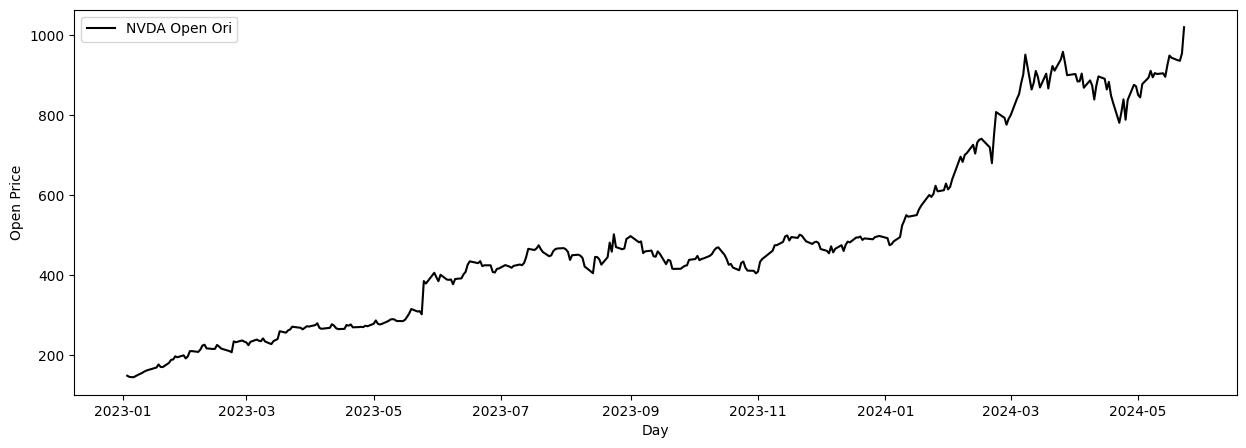

In [ ]:
# 오픈가 기준 선형 차트
# x축 시간, y축 주가
plt.figure( figsize=(15, 5) )

# 원본 데이터 시초가
plt.plot( stock_times, stock_open_data, color='black', label='NVDA Open Ori')
# plt.plot( stock_times, stock_df['Close'].values, color='blue',
#           linestyle='--',
#           label='NVDA Close Ori')

# 축 이름
plt.xlabel('Day')
plt.ylabel('Open Price')

# 범례
plt.legend()
plt.show()

### 데이터 준비

- 대상 데이터만 추출
    - 시초가, 고가, 저가, 종가, 볼륨
    - 학습을 대비하여 기준일 단위로 피처데이터와 타겟데이터구성
        - 14일 기준
            - D ~ D+14 : 피처데이터
            - D+15 : 타겟데이터
        - 매일 하루씩 뒤고 가면서 데이터를 구축

In [ ]:
cols = list( stock_df.columns[1:] )
cols

['Open', 'High', 'Low', 'Close', 'Volume']

In [ ]:
stock_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    350 non-null    object 
 1   Open    350 non-null    float64
 2   High    350 non-null    float64
 3   Low     350 non-null    float64
 4   Close   350 non-null    float64
 5   Volume  350 non-null    int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 16.5+ KB


In [ ]:
# 딥러닝시 데이터는 모두 수치형 -> 편의상 float로 통일해서 관리
stock_num_df = stock_df[ cols ].astype( float )
stock_num_df

,Open,High,Low,Close,Volume
0,148.509995,149.960007,140.960007,143.149994,40127700.0
1,145.669998,148.529999,142.410004,147.490005,43132400.0
2,144.910004,145.639999,141.479996,142.649994,38916800.0
3,144.740005,150.100006,140.339996,148.589996,40504400.0
4,152.839996,160.559998,151.410004,156.279999,50423100.0
...,...,...,...,...,...
345,943.690002,947.400024,918.059998,924.789978,35969100.0
346,937.500000,952.000000,934.400024,947.799988,31876400.0
347,935.989990,954.000000,931.799988,953.859985,32894600.0
348,954.590027,960.200012,932.489990,949.500000,54864800.0


- 피처엔지니어링
    - 정규화 처리
        - 주가 상승이 너무 커서 (7~8배) 단위가 않맞음
        - 거래량과 주가도 단위가 않맞음
        - StandardScaler 활용

In [ ]:
from sklearn.preprocessing import StandardScaler

# 원래값 => 스케일링 => 특정값 범위에서 처리
# 평균0, 표준편차 1.0의 정규분포를 따르는 StandardScaler()를 이용하여 스케일링 처리함
stock_scaler = StandardScaler().fit(stock_num_df)
stock_num_df_scaled = stock_scaler.transform( stock_num_df )
stock_num_df_scaled

# 차후, 예측 => 스케일러 => 원복

array([[-1.50393852, -1.50864256, -1.53337439, -1.5337053 , -0.50437943],
       [-1.51661821, -1.5149159 , -1.52675481, -1.5142917 , -0.31363837],
       [-1.52001134, -1.5275941 , -1.53100051, -1.53594188, -0.58124846],
       ...,
       [ 2.01191111,  2.01861712,  2.07699574,  2.0927376 , -0.96354315],
       [ 2.0949544 ,  2.04581608,  2.08014576,  2.07323465,  0.43114498],
       [ 2.38698929,  2.49766865,  2.45773643,  2.46906534,  2.22168466]])

- 훈련용, 테스트용
    - 훈련용
        - 데이터 처음부터 90%까지 사용<-설정
        - 전체데이터 350일치중 90%부분만 훈련용으로 사용
        - 나머지 10%는 예측을 수행하여 실제 정답과 비교하여 모델의 성능을 가늠할수 있음
    - 테스트용
        - 이 부분 날짜(최신일 기준, 10%)<-설정

In [ ]:
# 훈련데이터, 테스트 데이터 분할시 train_test_split()을 사용한다면, 절대로 셔플 X
# 시간순 데이터이기 때문에 셔플금지
# 총 데이터에서 90% 지점의 개수
DIV_RATE = 0.9
num, _ = stock_num_df_scaled.shape
# 정수처리 -> 슬라이싱시 사용하게 처리
index_90_line = int(num*DIV_RATE)
index_90_line

315

In [ ]:
# 정규화된 데이터로부터, 90% 데이터 추출 -> 훈련용 준비
train_data_scaled = stock_num_df_scaled[:index_90_line]
train_data_time   = stock_times[:index_90_line]

train_data_scaled.shape, train_data_time.shape

((315, 5), (315,))

In [ ]:
# 정규화된 데이터로부터, 10% 테스트 데이터 추출 -> 테스트용 준비
test_data_scaled = stock_num_df_scaled[index_90_line:]
test_data_time   = stock_times[index_90_line:]

test_data_scaled.shape, test_data_time.shape

((35, 5), (35,))

- 최종 훈련/테스트데이터 목표
    - 피처데이터
        - 14일단위로 훈련, 15일차를 맞춘다
            - 훈련 데이터 입력 (315, 5)
            - 변환작업후 ( 315-14, 14, 5)
                - (301, 14, 5)
            - 테스트 데이터 입력 (35, 5)
            - 변환작업후 ( 35-14, 14, 5)
                - (21, 14, 5)
    - 타겟데이터
        - 훈련용 정답데이터
            - (301, 1)
        - 테스트용 정답데이터
            - (21, 1)

In [ ]:
# 기준값 정의
PREDICT_DAY     = 1  # 14일치 데이터를 기준으로 다음날 1Day 예측
FEATURE_STD_DAY = 14 # 14일치 데이터를 보고 다음날 예측
INPUT_DIM       = 5  # 예측을 위한 하루단위 피처 개수 Open,High,Low,Close,Volume

In [ ]:
# 데이터가 크면 처음부터 배열 단위 고려
X_train, X_test, y_train, y_test = list(), list(), list(), list()

# 실습 5분
# 훈련용 range( 14, 90%데이터개수-PREDICT_DAY+1, PREDICT_DAY )
# 구현
for i in range( FEATURE_STD_DAY, index_90_line-PREDICT_DAY+1, PREDICT_DAY ):
    # [ 0:14,..] => [1:15, ..]=> [2:16, ..]
    X_train.append( train_data_scaled[ i - FEATURE_STD_DAY:i, : ] )
    # 14일이경과되고 다음날의 시초가(open) -> 컬럼값 0
    # [ 14:15, 0] => [15:16, 0] => [16:17, 0]
    y_train.append( train_data_scaled[ i + PREDICT_DAY -1:i + PREDICT_DAY , 0 ] )
    pass

# 테스트용 range( 14, 10%데이터개수-PREDICT_DAY+1, PREDICT_DAY )
index_10_num = len( test_data_scaled )
for i in range( FEATURE_STD_DAY, index_10_num-PREDICT_DAY+1, PREDICT_DAY ):
    X_test.append( test_data_scaled[i - FEATURE_STD_DAY:i, : ] )
    y_test.append( test_data_scaled[i + PREDICT_DAY -1:i + PREDICT_DAY , 0 ] )
    pass
# 구현


X_train, y_train = np.array(X_train), np.array(y_train)
X_test, y_test   = np.array(X_test), np.array(y_test)

In [ ]:
# 데이터를 배열로 담아서 최종 확인
X_train.shape, X_test.shape, y_train.shape, y_test.shape
# (301, 14, 5), (21, 14, 5), (301, 1), (21, 1)

((301, 14, 5), (21, 14, 5), (301, 1), (21, 1))

### 모델 구축 및 학습

- tensorflow + keras
- LSTM
    - 2개층 구성
        - 1f -> 64 (설정)
            - hidden state 전달되게 설정
            - 다음 층도 LSTM 이므로
        - 2f -> 32 (설정)
            - hidden state 전달되게 X
            - 다음 층은 Dense 이므로 y로만 출력되게 구성
        - output -> 1의 값으로 수렴(연속형데이터, 주가를 예측) -> 최소 오차로 예측

- 특징
    - 순환신경망 :
        - 입력
            - 이전 시점의 은닉상태 h<sub>t-1</sub> + x<sub>t</sub> 입력
        - 출력
            - h<sub>t</sub>
            - y<sub>t</sub>

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

_, ouptut_size = y_train.shape
# 둘다 표현 가능
# _, feat_day, feat_col = X_train.shape
# input_shape    =  (feat_day, feat_col)
input_shape    =  (FEATURE_STD_DAY, INPUT_DIM)

model = Sequential()
model.add( LSTM( 64, return_sequences=True, input_shape=input_shape) )
# return_sequences=False -> hidden state 전달 x
model.add( LSTM( 32, return_sequences=False) )
model.add( Dense( ouptut_size ) ) # 1개의 예측값(시초가)로 나온다

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 14, 64)            17920     
                                                                 
 lstm_1 (LSTM)               (None, 32)                12416     
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 30369 (118.63 KB)
Trainable params: 30369 (118.63 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
from tensorflow.keras.optimizers import Adam

# 컴파일 환경
# 모델의 목표가 주가를 최대한 가깝게 맞추는 회구형 문제이므로 - 손실함수는 mse, rmse,... 구성
model.compile( optimizer=Adam(learning_rate=0.01), loss='mse')

In [ ]:
history = model.fit( X_train, y_train,
                     epochs=50, batch_size=32,
                     validation_split=0.1,
                     verbose=1
                     )

Epoch 1/50
9/9 [==============================] - 15s 318ms/step - loss: 0.1638 - val_loss: 0.1791
Epoch 2/50
9/9 [==============================] - 0s 45ms/step - loss: 0.0304 - val_loss: 1.4447
Epoch 3/50
9/9 [==============================] - 0s 52ms/step - loss: 0.0181 - val_loss: 0.2373
Epoch 4/50
9/9 [==============================] - 0s 49ms/step - loss: 0.0100 - val_loss: 0.2804
Epoch 5/50
9/9 [==============================] - 0s 39ms/step - loss: 0.0066 - val_loss: 0.2705
Epoch 6/50
9/9 [==============================] - 0s 44ms/step - loss: 0.0056 - val_loss: 0.1462
Epoch 7/50
9/9 [==============================] - 1s 65ms/step - loss: 0.0041 - val_loss: 0.2724
Epoch 8/50
9/9 [==============================] - 0s 43ms/step - loss: 0.0037 - val_loss: 0.1771
Epoch 9/50
9/9 [==============================] - 0s 57ms/step - loss: 0.0037 - val_loss: 0.2224
Epoch 10/50
9/9 [==============================] - 0s 53ms/step - loss: 0.0034 - val_loss: 0.2268
Epoch 11/50
9/9 [==========

In [ ]:
# 가중치 저장
model.save_weights('stock_lstm_weight.h5')

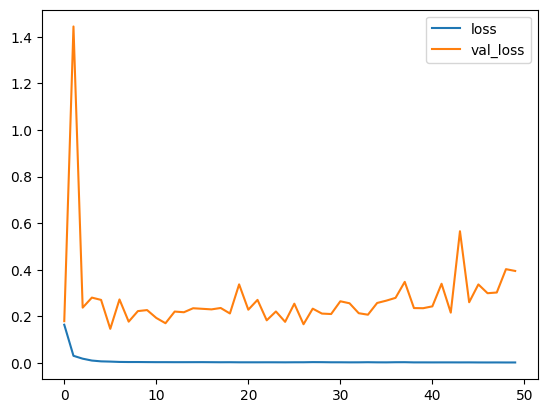

In [ ]:
plt.plot( history.history['loss'], label='loss')
plt.plot( history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

### 주가 예측

- 방법
    - 테스트데이터 -> 예측 -> 예측값 -> 스케일러 -> 복원
    - 오늘 주가 정보(시초가, 최고가,...) -> 내일 시초가 예측되서 나온다(오차값)

In [ ]:
y_pred = model.predict( X_test )
y_pred

1/1 [==============================] - 1s 1s/step


array([[1.2705739],
       [1.2598257],
       [1.2590585],
       [1.2844927],
       [1.2618978],
       [1.2134339],
       [1.2042081],
       [1.2067751],
       [1.2268077],
       [1.247711 ],
       [1.2467635],
       [1.2803131],
       [1.2944242],
       [1.2923759],
       [1.3109714],
       [1.3518162],
       [1.3924273],
       [1.3889632],
       [1.3881809],
       [1.414453 ],
       [1.4374253]], dtype=float32)

In [ ]:
# np.newaxis : 배열의 차원을 확장 -> 언스퀴즈 느낌
stock_scaler.mean_[ np.newaxis, :]

array([[4.85362142e+02, 4.93855570e+02, 4.76840742e+02, 4.86017714e+02,
        4.80730727e+07]])

In [ ]:
# np.repeat() : 배열요소를 반복해서 구성해준다
# (21, 5) => 더미값(임의값, stock_scaler.mean_ 등) 활용하여 (21, 5)를 구성함
temp_mean_value = np.repeat( stock_scaler.mean_[ np.newaxis, :], len(y_pred), axis=0)
temp_mean_value.shape

(21, 5)

In [ ]:
# 시초가 자리에 예측값 세팅
temp_mean_value[ :, 0] = np.squeeze(y_pred)

In [ ]:
# 스케일링 -> [ [예측값대체, , , , ], [예측값대체, ], ...]
# 예측한값은 시초가값만 존재 -> 4개의 영역이 추가로 필요
# 단위 환산 ->
# 예측 주가값
stock_open_pred = stock_scaler.inverse_transform(temp_mean_value)[:, 0]
stock_open_pred

array([769.9452728 , 767.53790263, 767.36605823, 773.06282278,
       768.00201066, 757.14705729, 755.08067916, 755.65562095,
       760.1425326 , 764.82443797, 764.61222242, 772.12667667,
       775.28726785, 774.82849991, 778.99351037, 788.14192821,
       797.23801307, 796.46212334, 796.28688798, 802.17133031,
       807.3166495 ])

In [ ]:
pred_count = stock_open_pred.shape[0]
pred_count

21

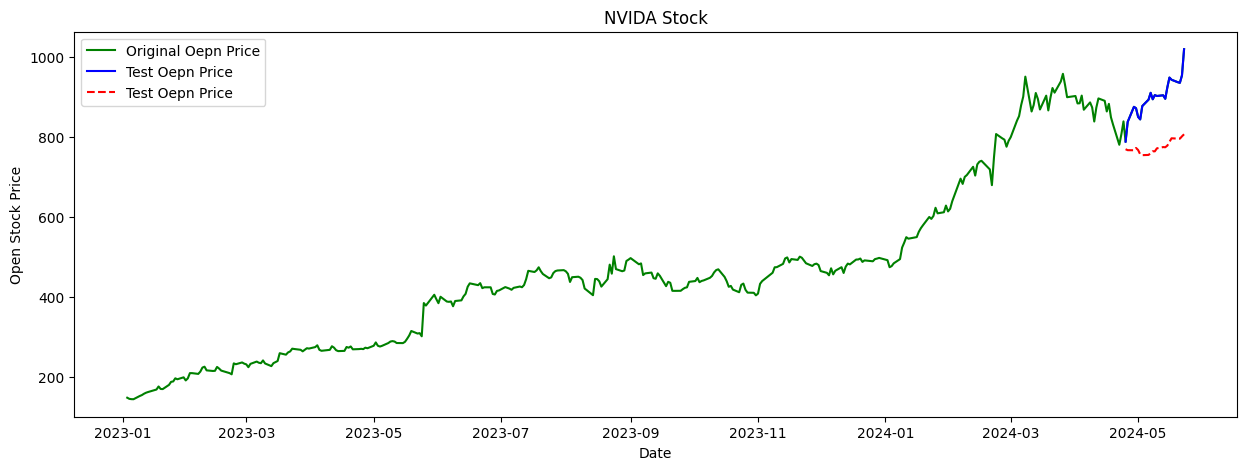

In [ ]:
import matplotlib.pyplot as plt

plt.figure( figsize = (15, 5) )

# 오픈가
plt.plot( stock_times, stock_open_data, color='green',
          label='Original Oepn Price')

# 테스트 데이터상 오픈가
# 위의 오픈가에 겹쳐서 그림
plt.plot( test_data_time[-pred_count:], stock_open_data[-pred_count:],
          color='blue', label='Test Oepn Price'
          )

# 예측결과에 따른 오픈가
plt.plot( test_data_time[-pred_count:], stock_open_pred[-pred_count:],
          color='red', linestyle='--', label='Test Oepn Price'
          )

# 데코 : 축 이름, 범례, 제목등
plt.xlabel('Date')
plt.ylabel('Open Stock Price')
plt.title('NVIDA Stock')
plt.legend()

# 화면출력
plt.show()

- 차트 해석
    - 실제 주가가 예측한 주가보다 더 많이 상승
        - 타 종목을 대부분 하락장, NVIDA만 상승
        - 요인
            - 정성적 요인 크게 작용
                - 하락 : 큰손들의 손절
                - 상승
                    - 실적 발표 기대감(예상되로 진행)
                    - 액면 분할 기대감(예상되로 진행)
                    - 등등.. 대상승
    - 금융
        - 시계열 분석
            - 정량분석 + 정성분석  => 정교한 예측값이 가능
            - AI 알고리즘 해지펀드들
                - 퀀트를 고용 개발 -> 자동매매
                - 매일 알고리즘 수정 진행